In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt

from mcopt.pipeline import Pipeline

# Load Morse Complexes

In [4]:
pipeline = Pipeline('../pipeline.config.json')

In [5]:
mc = pipeline.complex('sinusoidal').frames[0]

> Loading sinusoidal complex
  config unchanged, reading complex


# Construct Morse Graphs

In [6]:
mg = mc.to_graph()

mg_step = mg.sample(rate=5, mode='step')
mg_geo = mg.sample(rate=5, mode='geo')

Text(0.5, 1.0, 'Geodesic sampling')

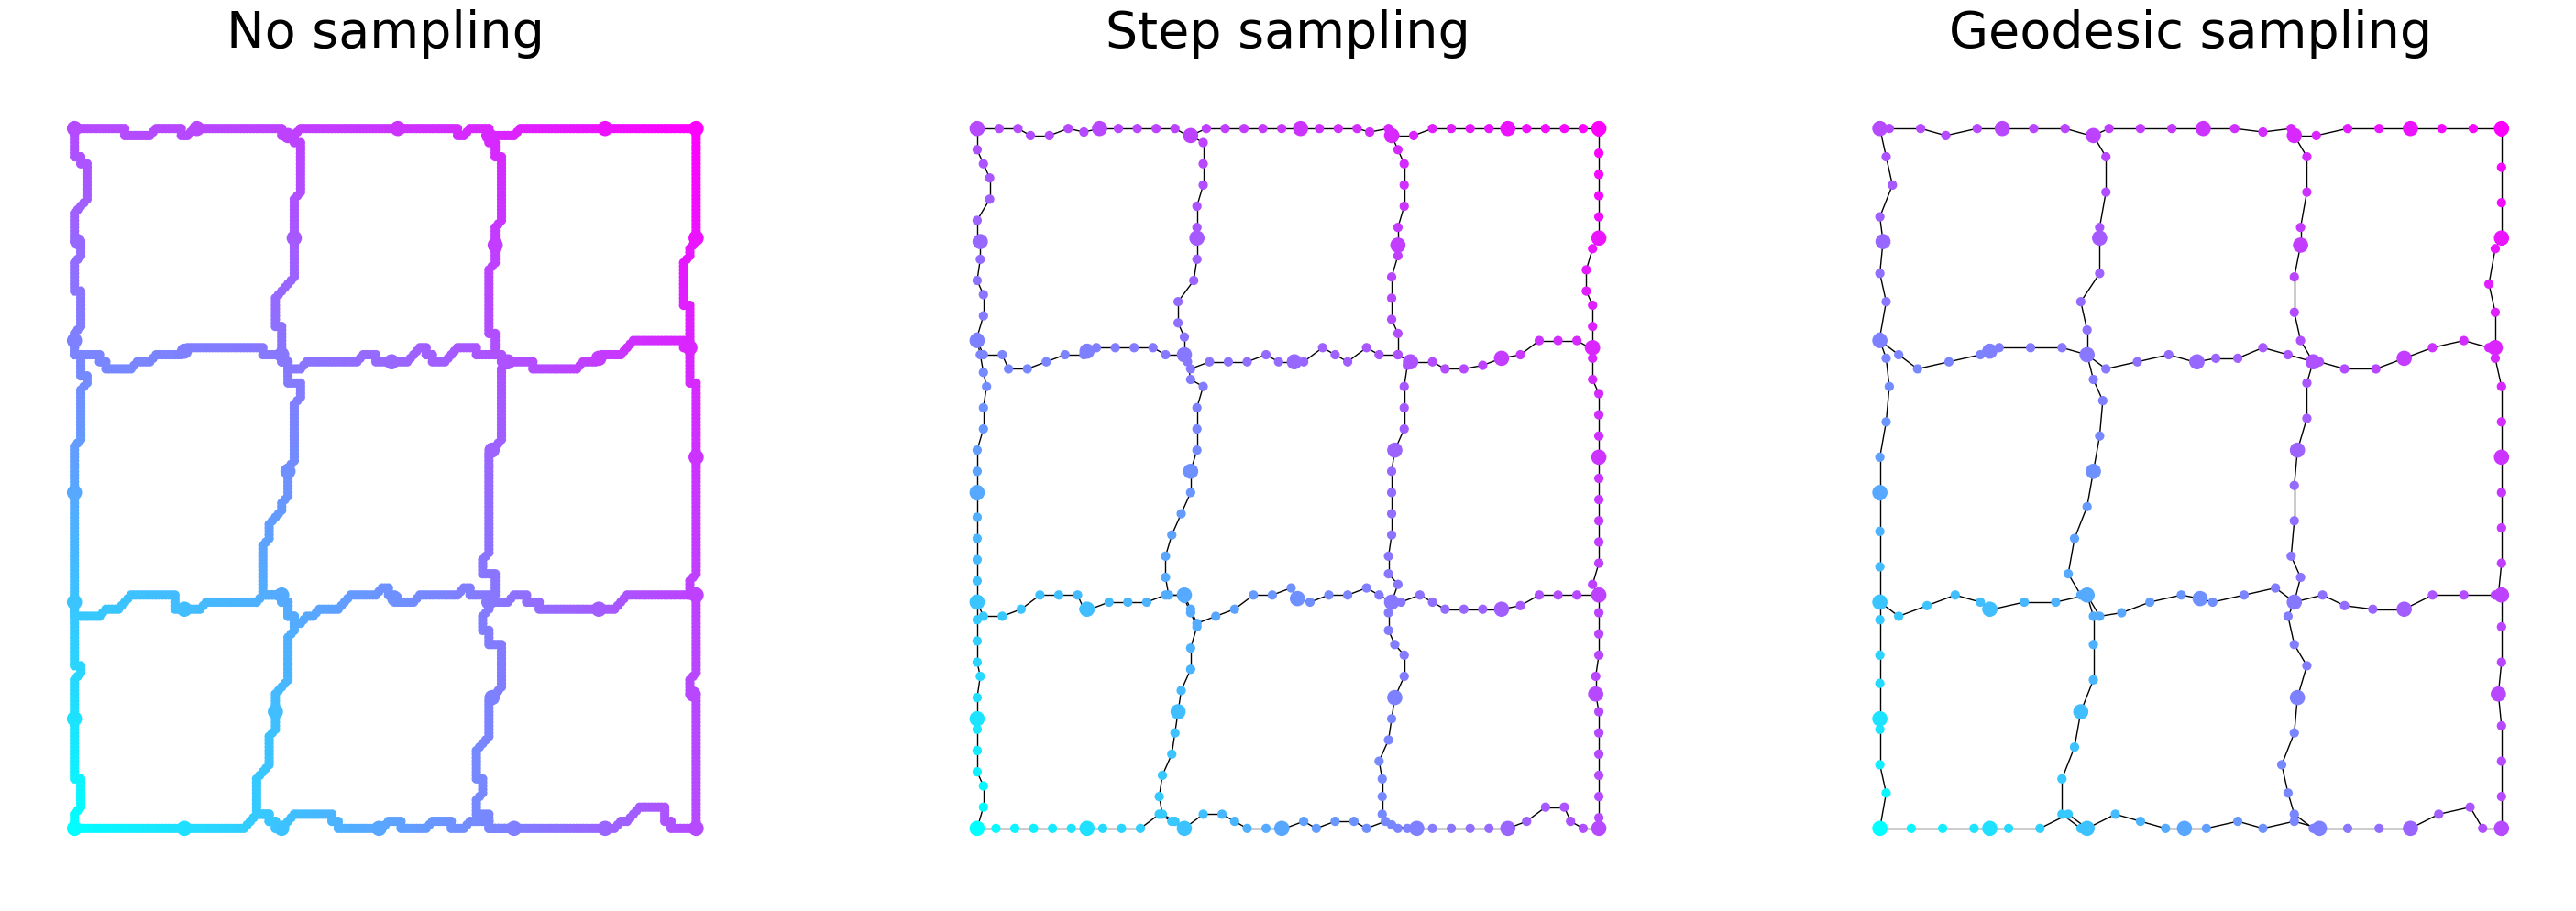

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(36, 12))
cmap = 'cool'

mg.draw(ax=axes[0], cmap=cmap)
axes[0].set_title('No sampling', fontsize=40)

mg_step.draw(ax=axes[1], cmap=cmap)
axes[1].set_title('Step sampling', fontsize=40)

mg_geo.draw(ax=axes[2], cmap=cmap)
axes[2].set_title('Geodesic sampling', fontsize=40)

# Construct Hypergraphs

In [8]:
mh = mg_step.to_hyper()

Text(0.5, 1.0, 'Simple construction')

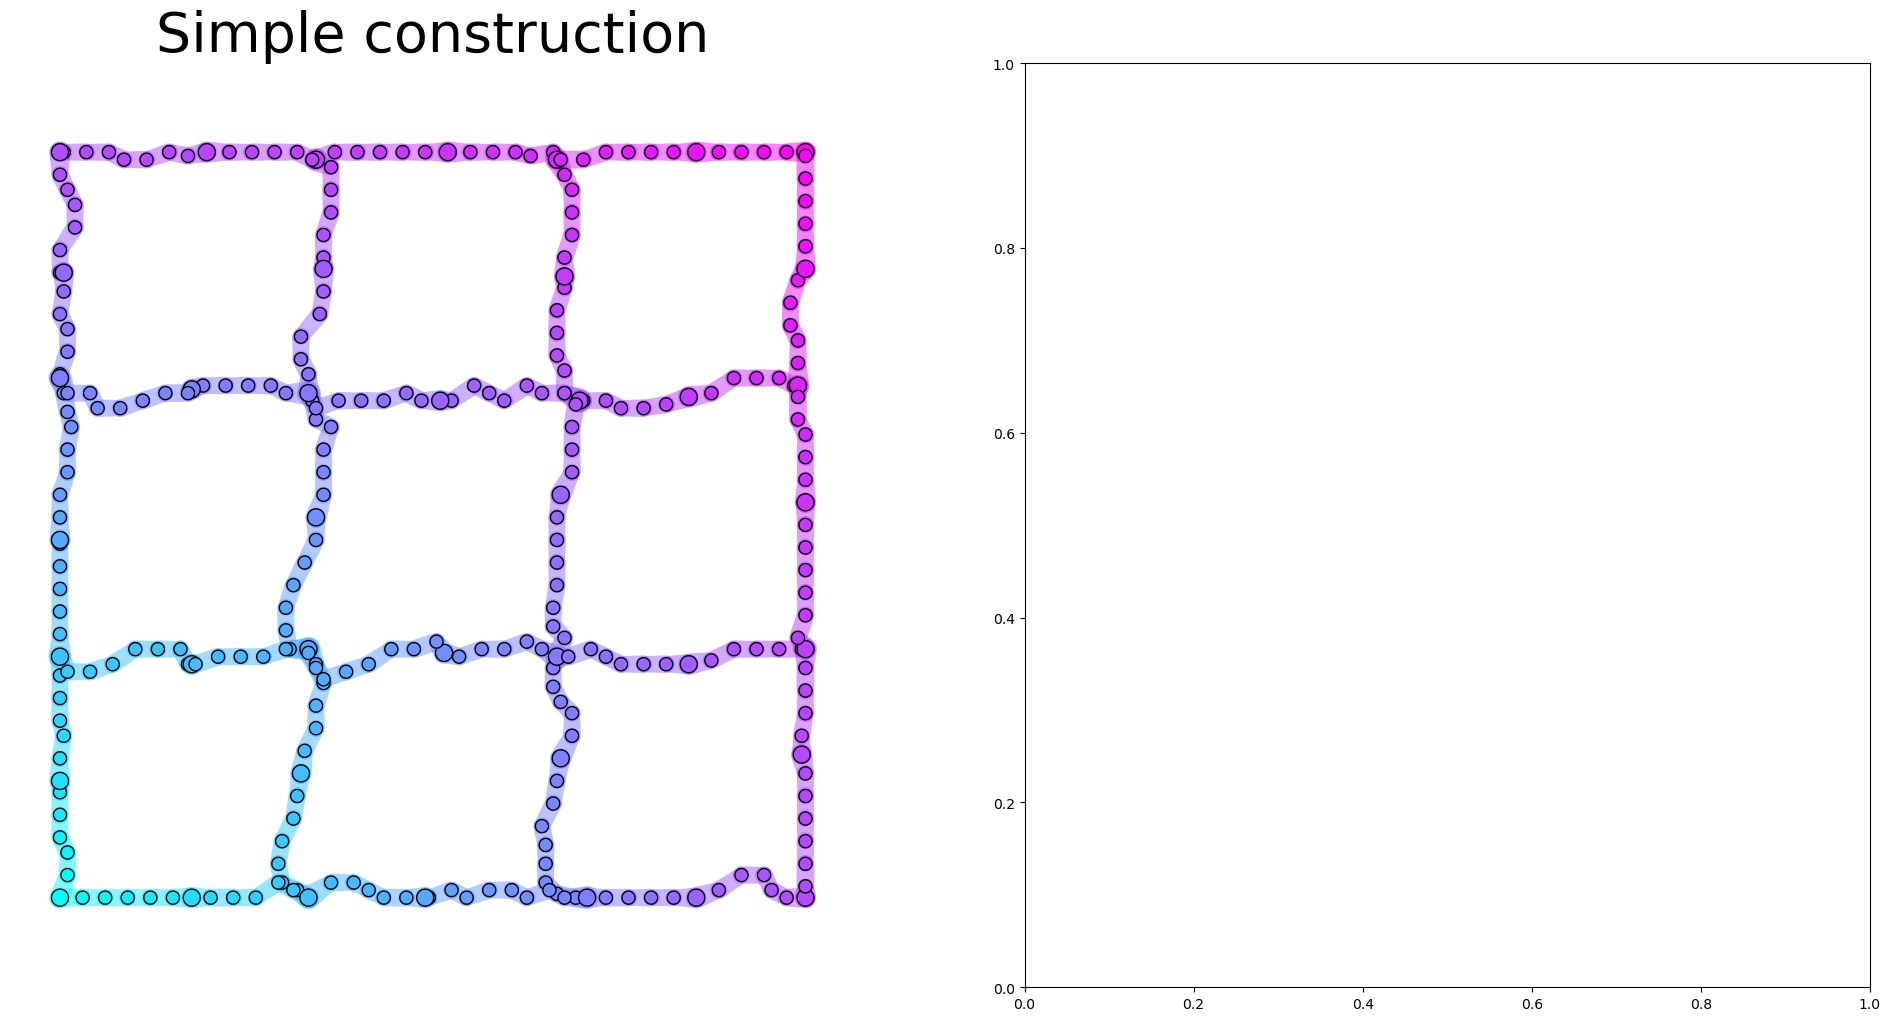

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mh.draw(ax=axes[0], cmap=cmap)
axes[0].set_title('Simple construction', fontsize=40)